In [111]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment4.ipynb")

# STK353 Assignemnt 4

Total marks: 14

## Instructions: 
    
   - Complete all questions 
   - remember to restart your kernel and run all cells before submitting.
   - Submit only the `ipynb` file | No need to rename it.

## Load the required packages

In [112]:

import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, nbinom, geom

## Question 1

### a) 

Write a function that will use the inverse transform method to simulate data from a Poisson distribution with parameter $\mu$. You may assume that the chances of getting values greater than 20 are trivial. 

<!--
BEGIN QUESTION
name: q1a
points: 3
-->

In [147]:
import math

def rpoi(size: int=1,mu: float = 1)-> 'np.ndarray':
    top=math.pow(mu, size)
    bottom=math.factorial(size)
    multiplier=math.pow(math.e,-mu)
    return np.array(multiplier*top/bottom)

def discrete_cdf(discrete_pmf,size, **kwargs):
    cdf = 0
    for k in range(size):
        cdf += discrete_pmf(size=k, **kwargs)
    return cdf

def get_probabilities(pmf, tol=10**(-5), **kwargs):
    pvec = []
    k = 1
    cdf = 0
    while (1-cdf) > tol:
        cdf = discrete_cdf(pmf, size=k, **kwargs)
        pvec.append(cdf)
        k += 1
    return pvec

def discrete_inv_transform_sample(pvec):
    pvec = np.sort(pvec)
    U = np.random.uniform(size=1)
    if U <= pvec[0]:
        return 0
    for k in range(1, pvec.__len__()):
        if U > pvec[k-1] and U <= pvec[k]:
            return k

p=get_prob(size=1000, mu=5, pmf=rpoi ,tol=10**(-5))
print(p)

def simulate(pmf, size, **kwargs):
    samples = []
    p = get_probabilities(rpoi, **kwargs)
    for i in range(size):
        samples.append(discrete_inv_transform_sample(p))
    return samples

def simulate(pmf, size, **kwargs):
    samples = []
    p = get_probabilities(rpoi, **kwargs)
    for i in range(size):
        samples.append(discrete_inv_transform_sample(p))
    return samples

[0.006737946999085469, 0.04042768199451281, 0.12465201948308118, 0.26502591529736175, 0.44049328506521246, 0.6159606548330632, 0.7621834629729388, 0.8666283259299928, 0.9319063652781516, 0.9681719426937954, 0.9863047314016172, 0.9945469080869909, 0.9979811483725632, 0.9993020100208603, 0.9997737463238235, 0.9999309917581446, 0.99998013095637, 0.9999945836617303]


In [148]:
grader.check("q1a")

q1a results: All test cases passed!

### b)

Using your function, generate 1000 samples from the Poisson distribution with parameter $\mu=5$. 

<!--
BEGIN QUESTION
name: q1b
points: 2
-->

In [153]:
poi_sims=np.array(simulate(rpoi, size=1000, mu=5))

In [154]:
grader.check("q1b")

q1b results: All test cases passed!

<!-- BEGIN QUESTION -->

### c)

Make a histogram of your simulated data in *b)* and overlay a plot of a Poisson density function with $\mu=5$. 

* Use 30 bins for the histogram

<!--
BEGIN QUESTION
manual: true
name: q1c
points: 5
-->

C:\SRC\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

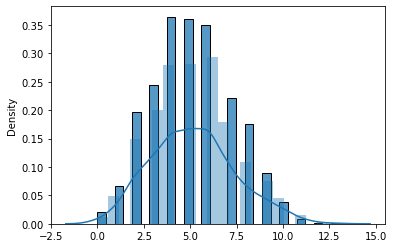

In [216]:
# x = np.linspace(0,20,21)
true_sample = np.random.poisson(lam=5,size=1000)
import seaborn as sns
sns.histplot(poi_sims, stat='density',bins=30)
sns.distplot(true_sample)

<!-- END QUESTION -->



## Question 2 


### a)

Write a function that will use the Acceptance-Rejection method to simulate data from a Negative Binomial type 1 distribution with parameters $k$ and $p$. Use a Geometric distribution with parameter $p=0.15$ as proposal. 

<!--
BEGIN QUESTION
name: q2a
points: 3
-->

In [215]:
def rnbin(size: int=1,k: int=1, p: float = 0.5)-> 'np.ndarray':
    t1=math.comb(k+size-1,size-1)
    t2=(p**size)
    t3=(1-p)**k
    return np.array(t1*t2*t3)

print(rnbin(size=10,k=7,p=0.5))
# print(type(math.comb(10+7-1,10-1)))

def rgeom(k: int=1, p: float = 0.5)-> 'np.ndarray':
    f=((1-p)**(k-1))*p
    return f

print(rgeom(k=2, p=0.15))

def randomvariate(pdf, n = 100, xmin=0, xmax=6):
    
    x = np.linspace(xmin, xmax, 1000)
    y = pdf(x)
    
    pmin = 0.
    pmax = y.max()
    
    # counters
    naccept = 0
    ntrial  = 0
    
    ran = []
    while naccept <= n:
        x = np.random.uniform(xmin, xmax) # ~ from g()
        y = np.random.uniform(pmin, pmax) # ~ from U
    
        if y < pdf(x):
            ran.append(x)
            naccept += 1
            ntrial += 1
            
    ran = np.asanyarray(ran)
    return ran, ntrial

randomvariate(rnbin)

0.0872802734375
0.1275


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
grader.check("q2a")

### b)

Using your function, generate 1000 samples from the Negative Binomial type 1 distribution with parameter $k=7$ and $p=0.5$.

<!--
BEGIN QUESTION
name: q2b
points: 2
-->

In [39]:
nb_sims= ...

In [ ]:
grader.check("q2b")

<!-- BEGIN QUESTION -->

### c)

Make a histogram of your simulated data in *b)* and overlay a plot of a Negative Binomial type 1 distribution with parameter $k=7$ and $p=0.5$. 

* Use 30 bins for the histogram

<!--
BEGIN QUESTION
manual: true
name: q2c
points: 5
-->

In [42]:
x = np.linspace(0,25,26)
...

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()